In [7]:
from IPython.core.display import display, Image
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException

options = Options()
options.headless = True
b = webdriver.Chrome(options=options, executable_path="chromium.chromedriver")

def show_screen():
    b.save_screenshot("screen.png")
    display(Image("screen.png"))

# Demo: BFS on pages

In [20]:
b.set_window_size(300, 200)
start_url = "https://tyler.caraza-harter.com/cs320/crawl/practice3/4.html"

https://tyler.caraza-harter.com/cs320/crawl/practice3/4.html


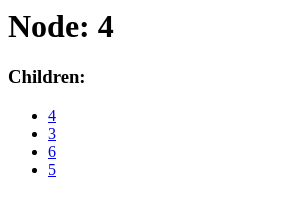

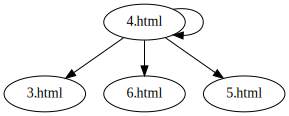

https://tyler.caraza-harter.com/cs320/crawl/practice3/3.html


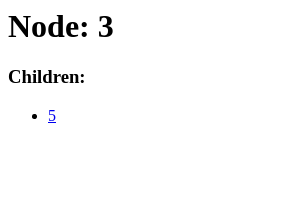

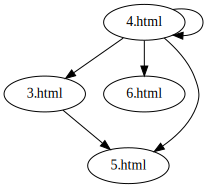

https://tyler.caraza-harter.com/cs320/crawl/practice3/6.html


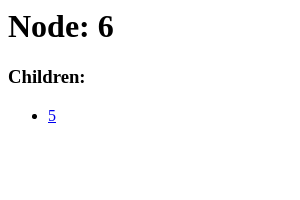

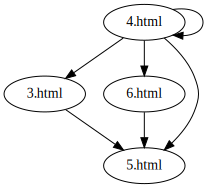

https://tyler.caraza-harter.com/cs320/crawl/practice3/5.html


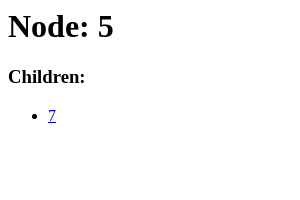

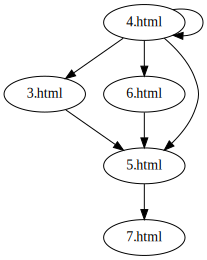

https://tyler.caraza-harter.com/cs320/crawl/practice3/7.html


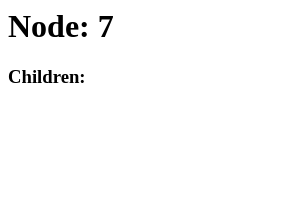

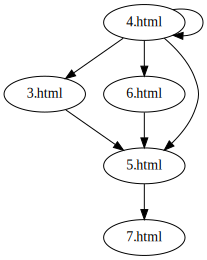

In [21]:
from collections import deque
from graphviz import Graph, Digraph
from IPython.core.display import display

# BFS
visit_todo = deque([start_url])
added = set([start_url])

gv = Digraph()

while len(visit_todo) > 0: # while there's work...
    # 1. do the work
    url = visit_todo.popleft()
    print(url)
    b.get(url)
    show_screen()
    
    gv.node(url.split("/")[-1])
    
    # 2. note down new work discovered
    links = b.find_elements_by_tag_name("a")
    for child in links:
        new_url = child.get_attribute("href")
        gv.edge(url.split("/")[-1],
                new_url.split("/")[-1])
        if new_url not in added:
            visit_todo.append(new_url)
            added.add(new_url)

    display(gv)

In [5]:
b.close()